# Edge Cases: The Making of Network Navigator and Critical Approaches to DH Tools

 ### John R. Ladd [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-5440-062X) 
Washington and Jefferson College

### Zoe LeBlanc
University of Illinois Urbana-Champaign

[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
© John R. Ladd and Zoe LeBlanc. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


NetworkAnalysis, Networks, Visualization, Tools, DH

This article will explore the role of network analysis research tools as/in scholarly infrastructure, and also detail our attempt to intervene in these practices by building *Network Navigator*, a browser tool for network analysis. In making *Network Navigator*, we intentionally contributed to an existing ecosystem of network analysis tools, namely *Gephi* and *Palladio*, but we were also motivated to combine the principles of minimal computing with new developments in web architecture and DH. We believe our perspective helps complicate our understanding of “tool”-building, making visible the obscured interpretive work of DH infrastructure. Given the centrality of GUI tools in introductory DH pedagogy, we believe that the making and maintaining of DH tools remains one of the profoundly influential, and yet consistently under theorized, areas of DH scholarship and teaching. Even as tools seem to be so foundational to DH, at the same time they remain rarely debated or even defined as a category. Rather than treating ‘tools’ as simply technical objects, we want to critically examine how their design and materiality directly shapes this conceptual amorphousness, but also more profoundly how this definitional problem makes it difficult to discern the ways DH tools are determining larger DH systems and infrastructure.

## Introduction

[Note to editors: At the moment our original proposal is standing in for the introduction.]

Since ‘Digital Humanities’ was first coined, debating the question of “what is Digital Humanities (DH)” has become so established that even asking it functions as a meta-discourse. And yet, even though the answers vary widely, many of them often include some reference to “DH tools.” While the meaning of ‘tool’ has changed, many of those most consistently used have been for network analysis – specifically *Gephi* and *Palladio*. While these existing network visualization tools have made network analysis accessible to many (not to mention popularized the force layout diagram), humanities scholarship on networks has often been limited to what these tools can produce.  How do these tools shape research and in turn how do they shape what scholars think is possible in network analysis? We propose to explore the role of these network tools as/in scholarly infrastructure, and also to detail our attempt to intervene in these practices by building Network Navigator, a browser tool for network analysis. 

In making *Network Navigator*, we intentionally contributed to this existing ecosystem of tools, but we were also motivated to combine the principles of minimal computing with new developments in web architecture and DH. But rather than uncritically adopting best practices from industry, we instead want to share the rationale for which features we decided to include and exclude from this version of our tool. We plan to structure our article around three questions:

- What does it mean for a tool to be user-friendly and is this even an achievable or desirable goal in DH tool design?
- In regards to networks, how can DH tools help researchers understand networks as both information design technique and a statistical methodology?
- Finally, what does it mean to design DH tools for specific use cases, and particularly seeing these tools as part of a broader pedagogical ecosystem where a tool may act as a researcher’s first introduction to a complex topic?

We believe our perspective helps complicate our understanding of “tool”-building, making visible the obscured interpretive work of DH infrastructure. Given the unique layered approach of JDH, we plan to compose our article using many of the JavaScript visualization techniques we used for *Network Navigator* as part of both the hermeneutic and narrative layers, as well as some data derived from DH scholarship using networks.

Ultimately, we want to share our experiences with *Network Navigator* to reconsider the category of DH tools. Given the centrality of GUI tools in introductory DH pedagogy, we believe that the making and maintaining of DH tools remains one of the profoundly influential, and yet consistently under theorized, areas of DH scholarship and teaching. Even as tools seem to be so foundational to DH, at the same time they remain rarely debated or even defined as a category. Rather than treating ‘tools’ as simply technical objects, we want to critically examine how their design and materiality directly shapes this conceptual amorphousness, but also more profoundly how this definitional problem makes it difficult to discern the ways DH tools are determining larger DH systems and infrastructure.

## Minimal Computing and Critical User-Friendliness

## Visualization and Metrics

### Metrics

One of the initial motivating factors for creating *Network Navigator* was to create a tool that foregrounded network metrics. This was in response to researchers’ increasing interest in network statistics and graph theory, coinciding with the growing popularity of cultural analytics and humanities data science. Where network analysis in the humanities was initially treated primarily as a critical visualization practice, by the time of *Network Navigator’s 1.0* release in 2017, interest had shifted toward what networks could tell us about communities statistically and computationally. The first version of the tool was made in response to this shift, but in the years between 2017 and the 2.0 release in 2021, it became clear that a more balanced approach between metrics and visualization would be ideal. While Network Navigator broke ground by making standard network metrics easily and quickly available in the browser, the 2.0 release expanded this vision by making both visualization and metrics equally foregrounded in the same interface, with all the same ease-of-use that the original tool provided. This section will detail the design decisions and computational principles that drove both *Network Navigator*’s original release and its 2021 update.

The initial vision for *Network Navigator*  was simply a table. The imagined user would drag-and-drop network data into the browser and receive in return cleanly-formatted tabular data, detailing some standard network metrics. These metrics would include degree, betweenness, and eigenvector centrality as well as clustering coefficients at the node level, and density, network size, and average degree at the graph level. This hadn’t quite been done at the time by the most popular tools for network analysis in the humanities. Palladio hadn’t yet integrated metrics at all. By contrast, Gephi had many available metrics, but these weren’t presented in a way that was clear to novices. Network Navigator took an approach in between—to select a handful of the most popular introductory metrics in an interface that would help users learn.

Shortly before Network Navigator was first designed, the team members of *Six Degrees of Francis Bacon* created a tutorial for The Programming Historian that outlined how to calculate standard network metrics in Python. The metrics included density, average shortest path length, diameter, and transitivity to measure the whole network, and degree, betweenness centrality, and eigenvector centrality to measure individual nodes. These metrics were chosen because they were already in regular use by the project team, and because the team noted these same metrics frequently occurring in other humanities network projects. Below is a brief demonstration of how to calculate these metrics in Python, and the code outputs a table in a nearly identical way to the first version of *Network Navigator*.

In [17]:
import networkx as nx
import pandas as pd

# Read CSV file
edgelist = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/quakers/quaker-edges.csv")

# Create Graph Object
G = nx.from_pandas_edgelist(edgelist, source="Source", target="Target")

# Calculate Graph-level metrics
print(f"""
Data on the Six Degrees of Francis Bacon Quakers Group:

{G}
Density: {nx.density(G):.4f}
Diameter: {nx.diameter(G)}
Avg. Shortest Path Length: {nx.average_shortest_path_length(G):.4f}
Transitivity {nx.transitivity(G):.4f}
""")

# Calculate Node-level metrics
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# Add attributes to graph
nx.set_node_attributes(G, degree, 'degree_centrality')
nx.set_node_attributes(G, betweenness, 'betweenness_centrality')
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

# Convert node table to Pandas DataFrame for display
nodes = pd.DataFrame.from_dict(G.nodes, orient='index')
nodes.reset_index(level=0,names="name",inplace=True)
nodes.sort_values("degree_centrality", ascending=False)


Data on the Six Degrees of Francis Bacon Quakers Group:

Graph with 96 nodes and 162 edges
Density: 0.0355
Diameter: 8
Avg. Shortest Path Length: 3.3789
Transitivity 0.1695



,name,degree_centrality,betweenness_centrality,eigenvector_centrality
3,George Fox,0.231579,0.366149,0.449175
4,William Penn,0.189474,0.371038,0.270317
34,James Nayler,0.168421,0.161498,0.335301
16,Margaret Fell,0.136842,0.187174,0.253171
2,George Whitehead,0.136842,0.195294,0.249744
...,...,...,...,...
39,Ellis Hookes,0.010526,0.000000,0.061067
43,William Mucklow,0.010526,0.000000,0.061067
46,John Whitehead,0.010526,0.000000,0.033954
55,Dorcas Erbery,0.010526,0.000000,0.045585


The code above reflects the current approach that *Network Navigator* takes to calculating metrics. The site uses JSNetworkX, a JavaScript library that ports many of NetworkX’s key features. Keeping the libraries consistent across languages was a key component of the consciously pedagogical design of *Network Navigator*—someone new to network analysis in a programming environment could at least begin to make sense of the site’s code.

Likewise, the choice of metrics was meant to guide the user toward the most common and, hopefully, the most useful measures for understanding networks in a humanities context. When first working with network data, humanities scholars are typically interested in two things: the overall network structure and the importance of individual nodes. Density, average shortest path length, diameter, and transitivity all give a sense of the overall size and shape of a network. Is the community close-knit or spread out? Would information travel through the network quickly or slowly? Similarly degree, betweenness, and eigenvector centrality are essential metrics for understanding a node’s importance. How central is a particular node in the network? Is a specific individual a hub (someone with a lot of connections) or a broker (someone who stands between several groups)? The goal of the first metrics-focused version of *Network Navigator* was to help researchers reason about these kinds of questions and perhaps begin to formulate answers.

A secondary goal of the 1.0 version was to subordinate visualization to metrics, an idea that came out of a genuine desire to help but needed serious revision in the site’s second version. *Network Navigator 1.0* took a somewhat polemical approach to its contemporary network tools. Seeing more emphasis on visualization than metrics in many tools for beginners, the site sought to make the opposite argument. Instead of creating visualization first, the site implicitly argued that the best way to first get acquainted with a network was through its metrics. To accomplish this, *Network Navigator 1.0* had only a small visualization that wasn’t very customizable, it used the built-in visualizer that came with JSNetworkX. The result was a very simple visualization like the one you see below:

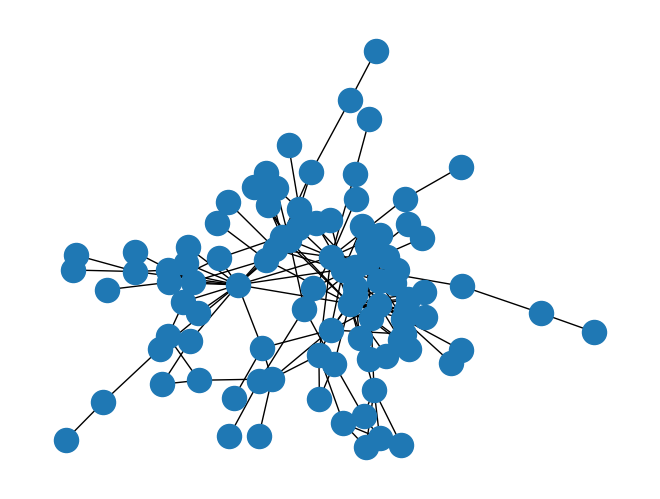

In [19]:
nx.draw(G)

metadata={
    "jdh": {
        "module": "object",
        "object": {
            "type":"image",
            "source": [
                "A simple NetworkX graph of the Quakers network"
            ]
        }
    }
}

You couldn’t update node or edge color, node size, position, or any of the typical customizations that users of network tools had become accustomed to. All of this was with the intention of steering the user away from treating a network as a primarily visual tool and toward the computational affordances of networks. But even by showing this small visualization, Network Navigator acknowledged that metrics alone weren’t sufficient for understanding a network. In fact, many of the metrics, like density, were made much clearer when accompanied by even the simple visualization that the first version of the tool provided. However, as more scholars engaged with the site it became clear that an interface that could provide both metrics and visualization on equal footing would be the best option.

### Visualization

As the authors of the original *Programming Historian* piece argue, when it comes to visualization and metrics in network analysis, it is impossible to have one without the other (<cite data-cite="962389/BP37DLUU"></cite>). The same is true in other forms of exploratory data analysis as well—good visualization lets you see aspects of the data that are difficult to understand fully with statistics alone, and vice versa. De-emphasizing visualization in Network Navigator 1.0 brought metrics to the foreground, but it made it difficult for users to fully understand their data without the use of another tool. The central idea of *Network Navigator 2.0*, then, was to put visualization and metrics on equal footing and to show as much as possible how each relied on the other.

Our desire to create a more robust set of visualizations for *Network Navigator* coincided with a number of interface principles and developments that coincide with our discussion of minimal computing in the previous section. Since the development of tools like Gephi, browser capabilities for network visualization have advanced to the point where a browser-based tool can do as much as a desktop application. This is particularly thanks to the D3.js library, which has greatly expanded what is possible to do with data in the browser. The use of D3 was a major part of the redesign of Six Degrees of Francis Bacon, which was in many ways the predecessor of Network Navigator’s visualization features.

The redesign of *Six Degrees of Francis Bacon* took advantage of a range of capabilities in D3. The SDFB networks could be filtered and manipulated by the user, their layout could be reconfigured, and color and size customization was available on the fly. Other tools had offered similar capabilities before, but the ease of using SDFB’s networks directly in the browser and its customization to humanities led many humanities scholars to ask the question, “When will there be *Six Degrees of _____?*” Where blank stands for whatever the questioner’s research area was. From these questions it was clear that there was a desire to have all the advantages of SDFB’s networks in the browser, but with any data set that the researcher might care to provide.

To respond to this perceived need, we set about to incorporate the best parts of *Six Degrees of Francis Bacon*’s visualizations into *Network Navigator*, but to do it in such a way that it would be integrated with and equal to (but never superseding) what the site was already featuring in its metrics. What resulted was an interface in which the user can easily move back and forth between the two views or even see both at once, and which takes up many of the design principles that made *Six Degrees of Francis Bacon* a template for many. What follows is an in-depth description of those features and how they are integrated into *Network Navigator*.